# Single Layer Perceptron - Iris
Risang Panggalih - 24/550961/PPA/06961

In [664]:
# library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# load dataset
df = pd.read_excel("iris.xlsx", header=None)
df.columns = ["x1","x2","x3","x4","target"]
display(df.head(5))

# binary encode labels: setosa=0, versicolor=1
df["target"] = df["target"].astype(str).str.strip()
df = df[df["target"].isin(["Iris-setosa","Iris-versicolor"])].copy()
y = (df["target"] == "Iris-versicolor").astype(int).to_numpy()
X = df[["x1","x2","x3","x4"]].to_numpy(float)

,x1,x2,x3,x4,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [665]:
# split Train:Validation 80:20
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [666]:
def Perceptron(
    X_train, y_train, X_val, y_val,
    lr=0.1, w=0, b=0, epoch=5
):
    X_train = np.asarray(X_train, float)
    X_val   = np.asarray(X_val,   float)
    y_train = np.asarray(y_train, int)
    y_val   = np.asarray(y_val,   int)

    # init weights
    if np.isscalar(w):
        w = np.full(X_train.shape[1], 0.5, dtype=float)
    else:
        w = np.asarray(w, float).copy()
    if np.isscalar(b):
        b = float(0.5)
    else:
        b = float(b)

    train_loss, val_loss = [], []
    train_accuracy, val_accuracy = [], []

    # training
    for ep in range(epoch):
        correct = 0
        sse_tr = 0.0

        # SGD
        for i in range(len(X_train)):
            xi = X_train[i]
            yi = y_train[i]

            z = xi @ w + b
            p = 1.0 / (1.0 + np.exp(-z)) # sigmoid
            pred = 1 if p >= 0.5 else 0
            if pred == yi:
                correct += 1

            e  = p - yi # error
            sse_tr += e*e # SSE total

            g = 2.0 * e * p * (1.0 - p) # MSE gradient factor
            dw = xi * g
            db = g

            w -= lr * dw
            b -= lr * db

        # epoch metrics (train)
        train_acc = correct / len(X_train)
        train_loss.append(float(sse_tr))
        train_accuracy.append(float(train_acc))

        # epoch metrics (val)
        sse_va = 0.0
        val_preds = []
        for i in range(len(X_val)):
            z = X_val[i] @ w + b
            p = 1.0 / (1.0 + np.exp(-z))
            pred = 1 if p >= 0.5 else 0
            val_preds.append(pred)
            e = p - y_val[i]
            sse_va += e*e

        val_acc = (np.array(val_preds) == y_val).mean()
        val_loss.append(float(sse_va))
        val_accuracy.append(float(val_acc))

        print(f"Epoch {ep+1}/{epoch} | Train SSE: {sse_tr:.6f}, Train Acc: {train_acc:.2f}% | "
              f"Val SSE: {sse_va:.6f}, Val Acc: {val_acc:.2f}%")

    return w, b, train_loss, val_loss, train_accuracy, val_accuracy

In [667]:
w0 = np.array([0.5,0.5,0.5,0.5], dtype=float)
b0 = 0.5

w_final, b_final, tr_sse, va_sse, tr_acc, va_acc = Perceptron(
    X_train, y_train, X_val, y_val,
    lr=0.1, w=w0, b=b0, epoch=5
)

Epoch 1/5 | Train SSE: 35.335711, Train Acc: 0.51% | Val SSE: 3.384386, Val Acc: 0.55%
Epoch 2/5 | Train SSE: 5.025060, Train Acc: 0.97% | Val SSE: 0.413418, Val Acc: 1.00%
Epoch 3/5 | Train SSE: 1.472648, Train Acc: 1.00% | Val SSE: 0.197977, Val Acc: 1.00%
Epoch 4/5 | Train SSE: 0.887696, Train Acc: 1.00% | Val SSE: 0.131231, Val Acc: 1.00%
Epoch 5/5 | Train SSE: 0.641659, Train Acc: 1.00% | Val SSE: 0.098484, Val Acc: 1.00%


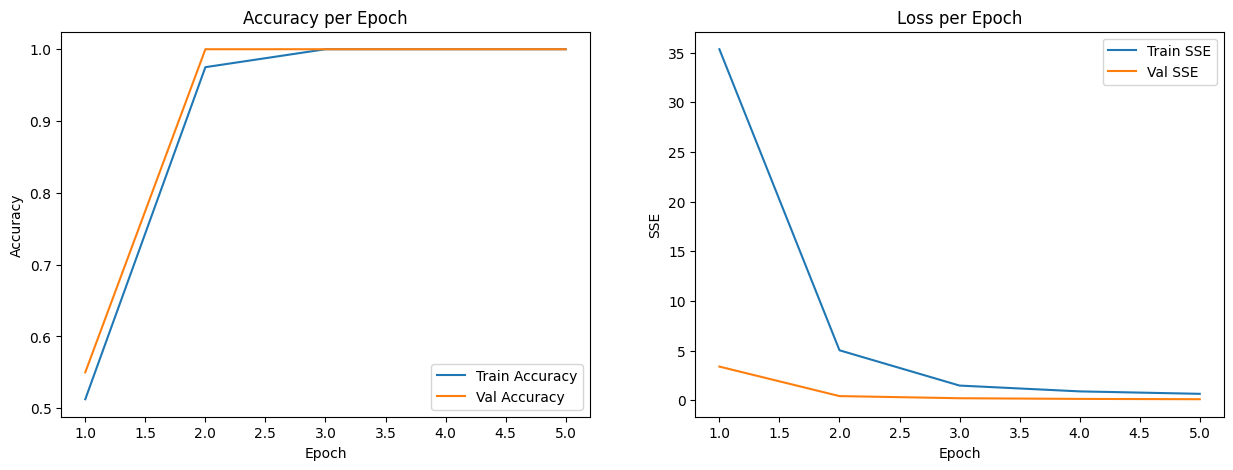

In [668]:
epoch = np.arange(1, len(tr_sse) + 1)

# accuracy
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.plot(epoch, tr_acc, label='Train Accuracy')
plt.plot(epoch, va_acc, label='Val Accuracy')
plt.xlabel('Epoch'); plt.ylabel('Accuracy')
plt.title('Accuracy per Epoch')
plt.legend()

# loss
plt.subplot(1,2,2)
plt.plot(epoch, tr_sse, label='Train SSE')
plt.plot(epoch, va_sse, label='Val SSE')
plt.xlabel('Epoch'); plt.ylabel('SSE')
plt.title('Loss per Epoch')
plt.legend()
plt.show()